### EDP

On se donne une fonction $F:\mathbb R^n \to \mathbb R^n $.

On cherche une fonction $(x,t)\to w(x,t)\in \mathbb R^n$ qui satisfait à l'EDP suivante:
$$ \tag{EDP}
 \partial_t w + \partial_x F(w) = 0
$$
C'est une équatino de conservation: l'évolution en temps de $w$ est donnée par une dérivée spaciale de $F(w)$ que l'on appelle naturellement le flux.  

### Discrétisation


On se donne un pas en espace $\delta_x$. On discrétise l'espace 
$$
[x_{i-\frac 12} ,x_{i+\frac 12}]
$$
On intégre l'équation de conservation dans chaque maille: 
$$
 \partial_t \int_{x-\frac 12}^{x+\frac 12} w + \int_{x-\frac 12}^{x+\frac 12} \partial_x (F \!\circ\! w) = 0
$$
qu'on peut aussi écrire:
$$
 \partial_t \int_{x-\frac 12}^{x+\frac 12} w + F\!\circ\! w (x_{i+\frac 12},t)- F\!\circ\! w (x_{i-\frac 12},t) = 0
$$



## Solution constante par morceaux. 

On suppose $w$ constante sur chaque maille: sa valeur sur $[x_{i-\frac 12} ,x_{i+\frac 12}]$ est notée $w_i=w_i(t)$. L'équation devient:
$$
 \delta_x \partial_t  w_i +  F\!\circ\! w (x_{i+\frac 12},t)- F\!\circ\! w (x_{i-\frac 12},t)  = 0
$$ 



Puis approximation en temps avec un schéma d'Euler explicite:
$$
 {\delta_x\over \delta_t} { (w^{n+1}_i-w^n_i) } +  F\!\circ\! w (x_{i+\frac 12},t_{n})- F\!\circ\! w (x_{i-\frac 12},t_n)  = 0
$$

Problème, il faut remettre tout le monde sur le même maillage spacial. 

On va chercher une fonction $G$, appelée "fonction de flux numérique", qui nous permet de définir un flux numérique, avec l'espoir qu'il approxime le flux à l'interface des cellules:
$$
\hat F_{i-\frac 12}:=G(w^n_{i-1},w^n_{i}) \approx F\!\circ\! w (x_{i-\frac 12},t_{n})
$$
On peut aussi prendre une fonction qui lit une fenêtre plus large:
$$
\hat F_{i-\frac 12}:=G(w^n_{[i-q,i+q[}) \approx F\!\circ\! w (x_{i-\frac 12},t_{n})
$$

Dès qu'on a un flux numérique, on a le schéma numérique:
$$
 {\delta_x\over \delta_t} { (w^{n+1}_i-w^n_i) } +  \hat F^n_{i+\frac 12} - \hat F^n_{i-\frac 12}   = 0
$$
Que l'on peut rendre plus explicitement:
$$
w^{n+1}_i     = w^n_i -{\delta_t\over \delta_x} (\hat F^n_{i+\frac 12} - \hat F^n_{i-\frac 12})
$$

### Informatiquement


* $w$ de longueur `nx`
* $w^{+2}$ de longueur `nx+2` est la prolongation de $w$ sur des deux extréminés, en utilisant une condition au limite.
* $\hat F$ est de longueur `nx+1`
$$
\hat F =G( w^{+2[},w^{+2]})
$$
*$d\hat F$ la différence de flux est de longueur `nx`
$$
d\hat F =\hat F^[-\hat F^]
$$
* Et l'itération à un temps de schéma: 
$$
w^{n+1}     = w^n -{\delta_t\over \delta_x} d\hat F
$$



### Que prendre comme fonction $G$?

Pour avoir la consistance du schéma il faut que
$$
G(w,w)=F(w)
$$
C'est tout à fait naturel puisque quand $\delta_x\to 0$ on a que $w^n_{i-1}$ et $w_i^n$  tendent vers $w(x_{i-\frac 12},t_n)$

Un choix naturel est le flux moyen
$$
\hat F_{i-\frac 12} = G(w_{i-1},w_i)= \frac{F(w_{i-1})+F(w_{i})}2
$$
Mais cela donne des schémas instables. Un meilleurs choix est:
$$
 G(w_{i-1},w_i)= \frac{F(w_{i-1})+F(w_{i})}2  - (w_{i}-w_{i-1})*D(w_{i},w_{i-1})  
$$
où $D$ est une fonction appelée Diffusion. Celle doit être positive. La Diffusion de Rusanov est:
$$
D(w_{i-1},w_{i}) = \frac 12 \max(|w_{i-1}|,|w_i|)
$$
Vocabulaire: $D$ dissipation ou viscosité ?



## Solution affine par morceaux, MUSCL


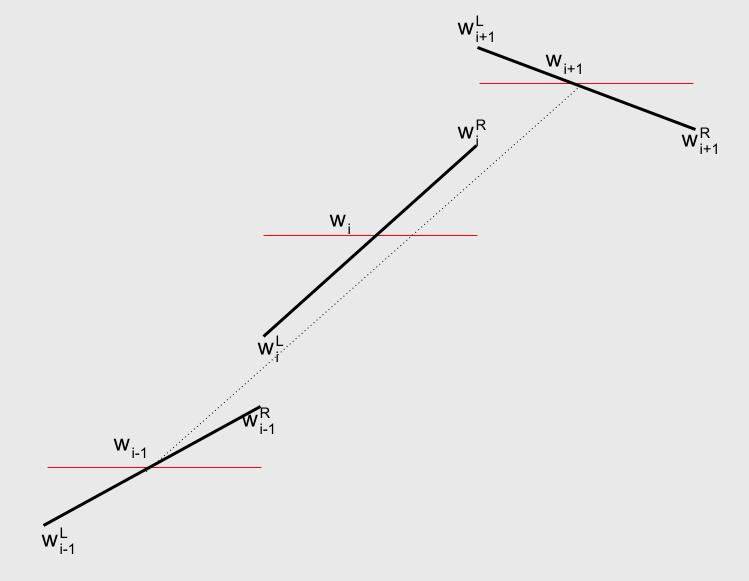


On peut supposer $w$ affine par maille. Notons toujours $w_i$ sa valeur au centre de la maille. $w_i^L,w_i^R$ les valeurs au bords des mailles: Ainsi

\begin{align}
w_i ^L &= w_i -{w_{i+1}-w_{i-1}\over 2} \\
w_i ^R &= w_i +{w_{i+1}-w_{i-1}\over 2} 
\end{align}



Mais plus généralement on peut se donner une fonction $L$, appelée limiteur de pente, puis définir:


\begin{align}
w_i ^L &= w_i -{\delta_x \over 2} L({w_{i}-w_{i-1}\over \delta_x},{w_{i+1}-w_i\over \delta_x}) \\
w_i ^R &= w_i +{\delta_x \over 2} L({w_{i}-w_{i-1}\over \delta_x},{w_{i+1}-w_i\over \delta_x})
\end{align}


Le choix initial revient à choisir
$$
L(a,b) = {a+b\over 2}
$$
Un choix meilleurs:
$$
L(a,b)= \text{minmod}(a,b)
$$





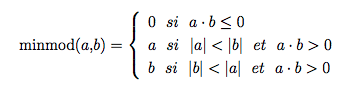



Enfin, le flux numérique est calculé par
$$
\hat F_{i-\frac 12}=G(w_{i-1}^R,w_{i}^L)
$$
où $G$ est l'une des fonction de Flux numérique classique (ex: Rusanov).


***Question:*** tout est calculé avec $w_{i-1}^R,w_{i}^L$. Il n'y a plus de $w_{i}$ qui apparait.

### Informatiquement


* $w^{+4}$ de longueur `nx+4` prolongé sur les 2 côtés
* $dw:=w^{+4[}-w^{+4]}$ est de longeur `nx+3`
* $w_L,w_R$ de longueur `nx+2`, sont définis par:
$$
w_L = w^{+2} -{\delta_x\over 2}L(dw^[,dw^])
$$
$$
w_R = w^{+2} +{\delta_x\over 2} L(dw^[,dw^])
$$
* $\hat F$ le flux numérique, de longueur `nx+1`, est défini par:
$$
\hat F =G( w_R^[,w_L^])
$$

Remarque: dans la version codée par Victor, on partait de $w^{+2}$, on obtenait des $w_L,w_R$ de longueur `nx` que l'on prolongeait ensuite avec des conditions au limites. Je trouve cela moins bien car les conditions au limites sont faites pour prolonger $w$ et pas d'autres quantités.



## Les différents apprentissages possibles

##  Flux appris


* $w$ de longueur `nx`
* $w^{+2p}$ de longueur `nx+2p` est la prolongation de $w$ sur des deux extréminés avec une condition au limite.
* $W^{+2p}$ de longueur `nx+2p` est une augmentation de $w^{+2p}$. Attention, il est plus physique d'effecteur la prolongation avant l'augmentation (même si dans de nombreux cas, les deux opérations commutent). 


* On se donne un réseaux de neuronne convolutif $M_\theta$, avec un champs de vision de $2p$ qui permet de produire  $\hat F$ est de longueur `nx+2p-2p+1=nx+1`. 
$$
\hat F = M_\theta( W^{+2p})
$$
Exemple avec $p=2$.

        -2  -1   0   1   2  ...      nx-2 nx-1 nx nx+1
         |---|---|---|                 |---|---|---| 
Remarques:
* La taille du champs de vision est paire ce qui est inhabituelle (par exemple en traitement d'image). Cela vient du fait que le modèle doit évaluer une quantité à cheval entre deux pixel.
*  le premier élément de $\hat F$ est capable d'approximer un flux en $-\frac 12$, qui est le bord gause de la première cellule. 
*  le dernier élément de $\hat F$ est capable d'approximer un flux en `(nx-1)`$+\frac 12$ qui est le bord droit de la dernière cellule. 









Variante: on se donne un flux numérique de référence, $\hat F_{ref}$, par exemple 
* Le Flux HLL pour Euler.
* Le Flux de Rusanov pour Burger

On initialise notre réseau de neurone pour qu'il renvoie 0 en début d'apprentissage. Puis on prend comme flux numérique
$$
\hat F = \hat F_{ref} + M_\theta( W^{+2p})
$$
Sur nos test, cette variante est largement meilleure. 




##  Viscosité apprise.


$$
\hat F = {F(w^{+2[}) + F(w^{+2]})\over 2} + (w^{+2]}-w^{+2[})  M_\theta( W^{+2p})
$$

Variante: la viscosité est la somme de celle de Rusanov et du réseau de neurone initialisé à zéro. 






### Limiteur de pense appris







* $w\_$ de longueur `nx+4+2p` prolongé sur les 2 côtés
* $dw$ de longeur `nx+3+2p`
$$
dw=w\_[1:]-w\_[:-1]
$$
* On se donne un réseau de neurone convolutif $M_\theta$ avec un champs de vision de $2p$. On calcul $w^L,w^R$ de longueur `nx+2` par
$$
w^L = w -{\delta_X\over 2} M_\theta(dw)
$$
$$
w^R = w +{\delta_X\over 2} L(dw[:-1],dw[1:])
$$
* $\hat F$ est de longueur `nx+1`
$$
\hat F =G( w^R\_[:-1],w^L\_[1:])
$$
* $d\hat F$, la différence de flux est de longueur `nx`
$$
d\hat F =\hat F[1:]-\hat F[:-1]
$$
* Et l'itération à un temps de schéma: 
$$
w^{n+1}     = w^n -{\delta_t\over \delta_x} d\hat F
$$